In [194]:
%%script false --no-raise-error
%%sh
export ZARR_V3_EXPERIMENTAL_API=1

In [195]:
%%time
# Create Testing Dataset, Change Parameters to vary size 
import xarray as xr
import numpy as np

u = np.random.rand(1_000_000, 10, 10, 1)
v = np.random.rand(1_000_000, 10, 10, 1)
w = np.random.rand(1_000_000, 10, 10, 1)
x = np.random.rand(1_000_000, 10, 10, 1)
y = np.random.rand(1_000_000, 10, 10, 1)
z = np.random.rand(1_000_000, 10, 10, 1)

ds = xr.Dataset(data_vars=dict(
                            u=(["1","2","3","4"], u),
                            v=(["1","2","3","4"], v),
                            w=(["1","2","3","4"], w),
                            x=(["1","2","3","4"], x),
                            y=(["1","2","3","4"], y),
                            z=(["1","2","3","4"], z)
                            ))

ds.to_zarr("data/test_dataset.zarr", mode="w", zarr_format=2)

ds.to_netcdf("data/test_dataset.nc", mode="w", format="NETCDF4", engine="netcdf4")

ds.to_netcdf("data/test_dataset.h5", mode="w", engine="h5netcdf")


CPU times: user 7.39 s, sys: 19.3 s, total: 26.7 s
Wall time: 27.6 s


In [196]:
#dataset creation for plotting

zarr_op_time = []
netcdf4_op_time = []
hdf5_op_time = []

zarr_read_time = []
netcdf4_read_time = []
hdf5_read_time = []

zarr_write_time = []
netcdf4_write_time = []
hdf5_write_time = []

In [197]:
%%time
#Open benchmark zarr
import zarr
import time

for i in range(10000):
    start_time = time.time()
    ds_zarr = zarr.open(store="data/test_dataset.zarr",mode="r+" ,zarr_version=2)
    zarr_op_time.append(time.time() - start_time) 
     


CPU times: user 287 ms, sys: 44.3 ms, total: 331 ms
Wall time: 298 ms


In [198]:
%%prun -r -D data/profile_open_zarr -q
ds_zarr = zarr.open(store="data/test_dataset.zarr",mode="r+" ,zarr_version=2)

 
*** Profile stats marshalled to file 'data/profile_open_zarr'.


         228 function calls in 0.001 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        7    0.001    0.000    0.001    0.000 {built-in method posix.stat}
        1    0.000    0.000    0.000    0.000 {built-in method io.open}
        1    0.000    0.000    0.000    0.000 {method 'read' of '_io.BufferedReader' objects}
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method posix.getcwd}
        1    0.000    0.000    0.000    0.000 {method '__exit__' of '_io._IOBase' objects}
        1    0.000    0.000    0.000    0.000 hierarchy.py:139(__init__)
        3    0.000    0.000    0.000    0.000 storage.py:146(_normalize_store_arg_v2)
        6    0.000    0.000    0.000    0.000 posixpath.py:71(join)
        3    0.000    0.000    0.000    0.000 store.py:114(_ensure_store)
        1    0.000    0.000    0.000    0.000 storage.py:1078(_f

In [199]:
%%sh 
gprof2dot -f pstats data/profile_open_zarr | dot -Tpng -o output.png

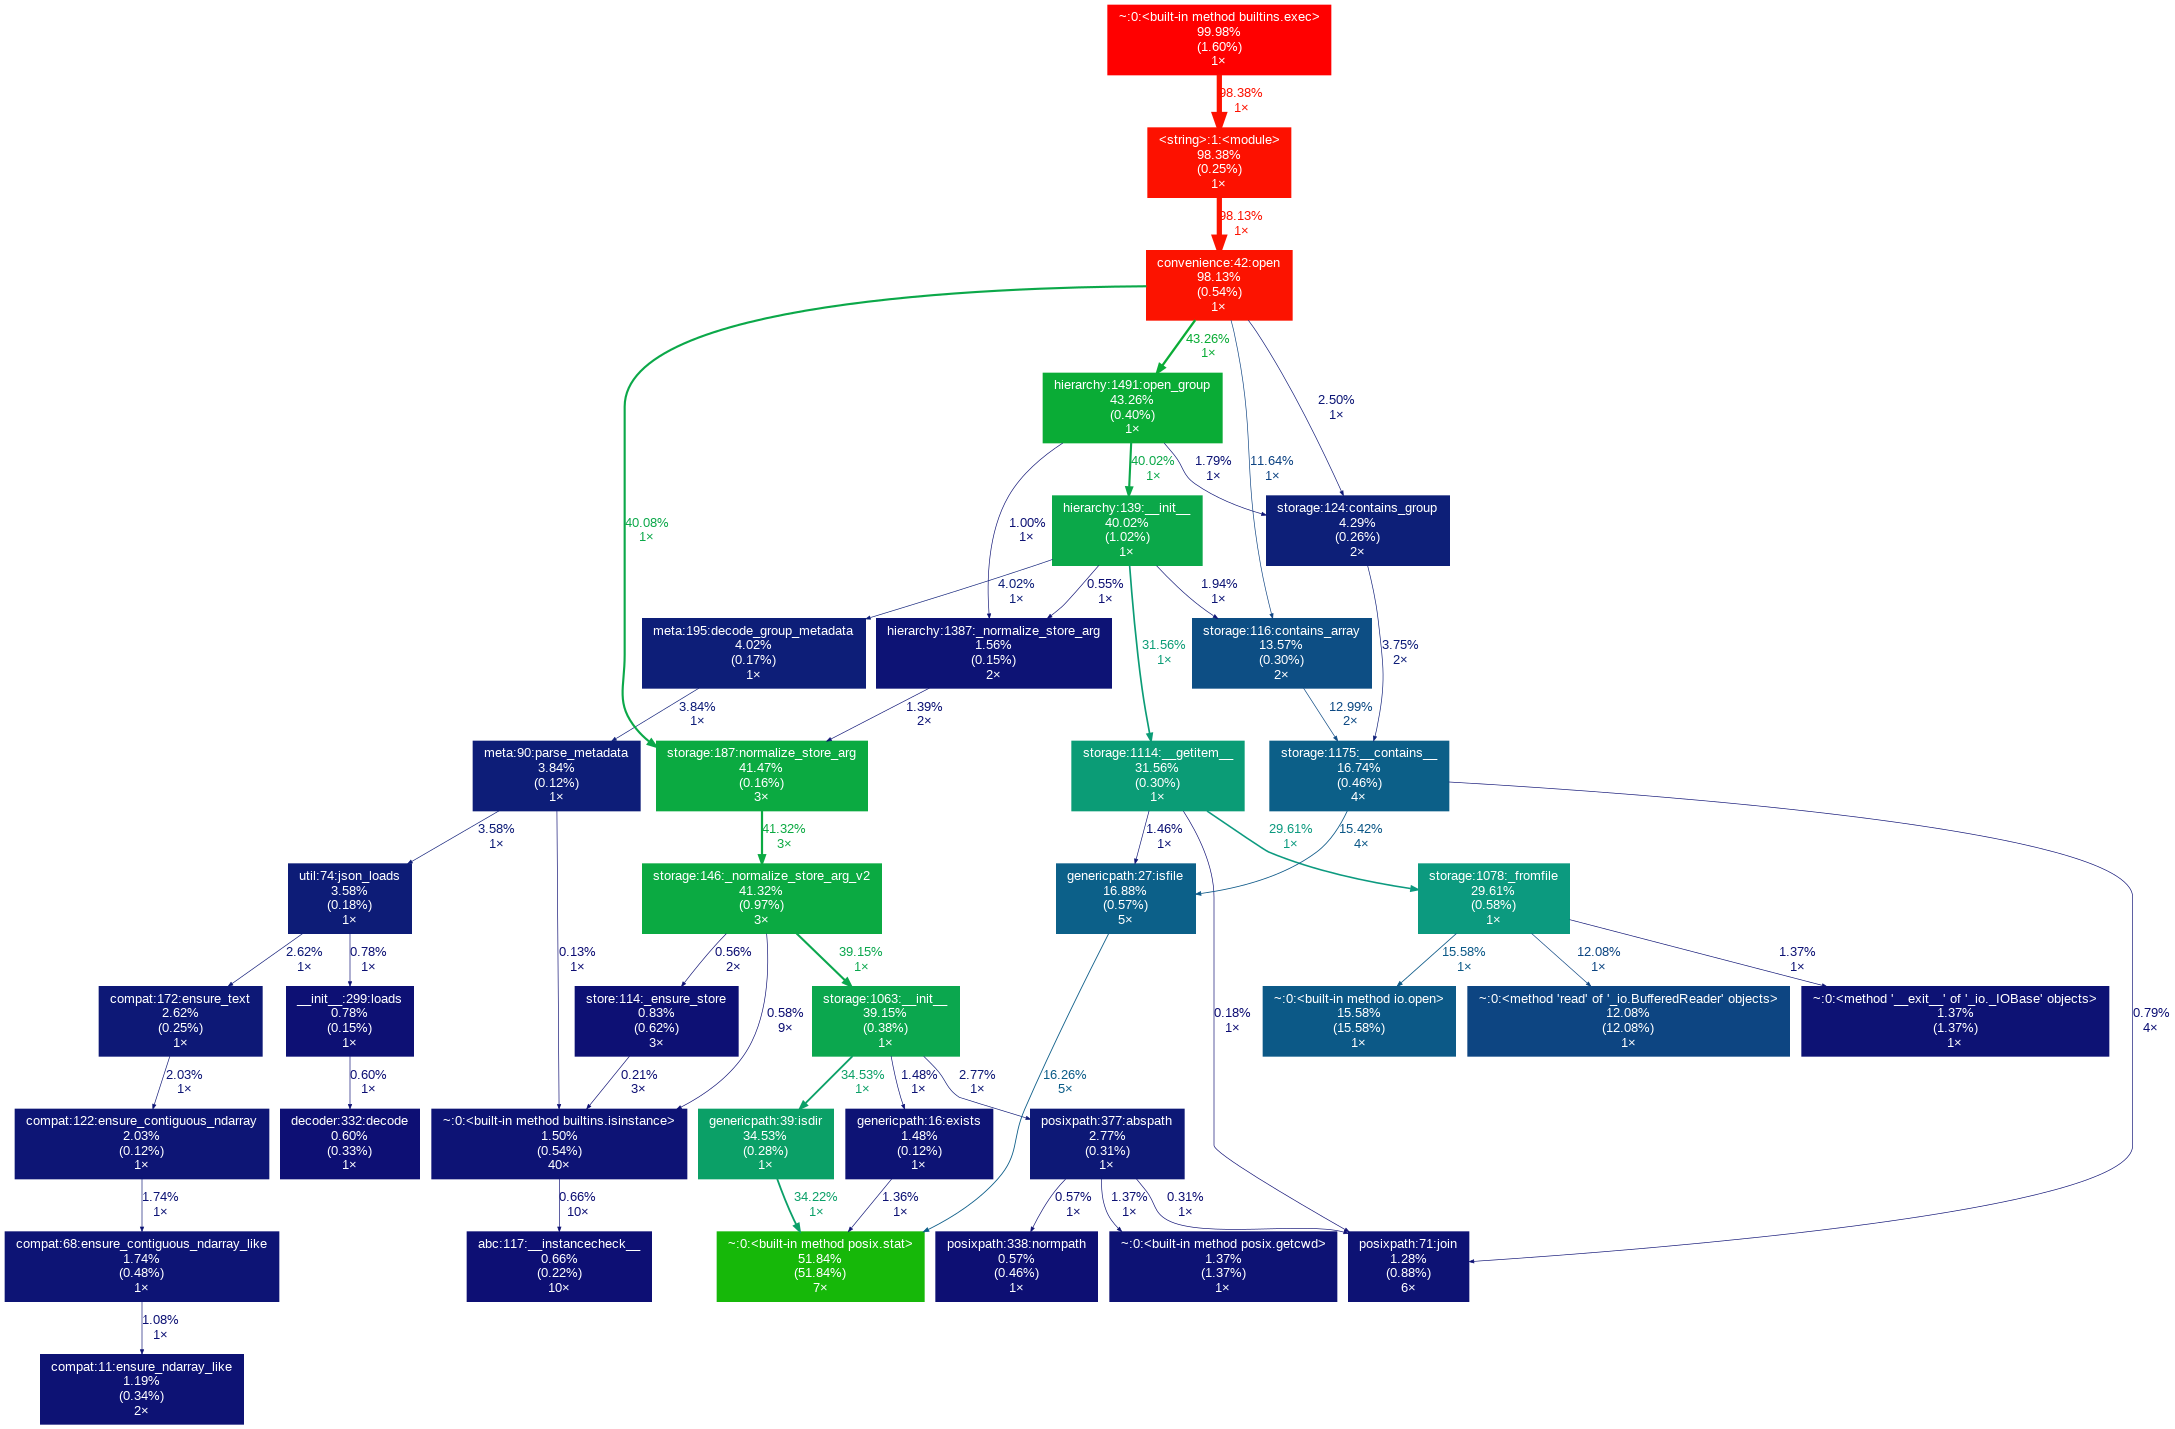

In [200]:
from IPython.display import Image

Image("output.png")

In [201]:
%%time 
#Read benchmark zarr
import time
import numpy as np
import zarr

ds_zarr = zarr.open(store="data/test_dataset.zarr",mode="r+" ,zarr_version=2)

for i in range(1000):
    #print(f"Currently in i: {i}")
    val_picked = np.random.randint(low=0, high=1000000-1)
    tmp=0
    
    start_time = time.time()
    tmp = ds_zarr["x"][val_picked]
    zarr_read_time.append(time.time() - start_time) 
    
    #print(f"Current val read at {val_picked}: {tmp}")
    

CPU times: user 3.24 s, sys: 2.88 s, total: 6.12 s
Wall time: 5.82 s


In [202]:
%%time 
#Write benchmark zarr
import time
import numpy as np
import zarr

ds_zarr = zarr.open(store="data/test_dataset.zarr",mode="r+" ,zarr_version=2)

for i in range(1_000):
    #print(f"Currently in i: {i}")
    val_picked = np.random.randint(low=0, high=1_000_000-1)
    tmp=0
    prev = ds_zarr["x"][val_picked]
    curr = ds_zarr["x"][val_picked]

    #print(f"prev item at {val_picked} is {type(prev)} and curr item at {val_picked} is {type(curr)}, both are the same : {(prev == curr).all()}")
    
    start_time = time.time()
    ds_zarr["x"][val_picked] = np.random.rand(10,10,1)
    zarr_write_time.append(time.time() - start_time) 
    
    curr = ds_zarr["x"][val_picked]
    #print(f"Current val read at {val_picked}: {(prev == curr).all()}")
    

CPU times: user 25.6 s, sys: 46.5 s, total: 1min 12s
Wall time: 1min 12s


In [203]:
%%time 
#Open Benchmark netcdf4
import time
import netCDF4

for i in range(1_0000):
    start_time = time.time()
    ds_netcdf4 = netCDF4.Dataset("data/test_dataset.nc", mode="r+", format="NETCDF4")
    netcdf4_op_time.append(time.time() - start_time)

CPU times: user 11.4 s, sys: 1.56 s, total: 13 s
Wall time: 15.3 s


In [204]:
%%prun -r -D data/profile_open_netcdf4 -q
ds_netcdf4 = netCDF4.Dataset("data/test_dataset.nc", mode="r+", format="NETCDF4")

 
*** Profile stats marshalled to file 'data/profile_open_netcdf4'.


         30 function calls in 0.001 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method posix.stat}
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
       24    0.000    0.000    0.000    0.000 utils.py:32(_find_dim)
        1    0.000    0.000    0.000    0.000 genericpath.py:16(exists)
        1    0.000    0.000    0.000    0.000 utils.py:479(_tostr)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [205]:
%%sh 
gprof2dot -f pstats data/profile_open_netcdf4 | dot -Tpng -o output.png

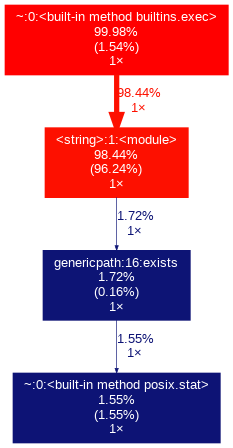

In [206]:
from IPython.display import Image

Image("output.png")

In [207]:
%%time
#Read Benchmark netcdf4
import time
import numpy as np
import netCDF4

ds_netcdf4 = netCDF4.Dataset("data/test_dataset.nc", mode="r+", format="NETCDF4")
    
    
for i in range(1000):
    #print(f"Currently in i: {i}")
        
    val_picked = np.random.randint(low=0, high=1_000_000-1)
    tmp=0
        
    start_time = time.time()
    tmp = ds_netcdf4.variables["x"][val_picked]
    netcdf4_read_time.append(time.time() - start_time)
        
    #print(f"Current val read at {val_picked}: {tmp}")

CPU times: user 82.2 ms, sys: 15 ms, total: 97.2 ms
Wall time: 87.1 ms


In [208]:
%%time
#Write Benchmark netcdf4
import time
import numpy as np
import netCDF4

ds_netcdf4 = netCDF4.Dataset("data/test_dataset.nc", mode="r+", format="NETCDF4")
    
for i in range(1000):
    #print(f"Currently in i: {i}")
        
    val_picked = np.random.randint(low=0, high=1_000_000-1)
    tmp = 0
    prev = ds_netcdf4.variables["x"][val_picked]
    curr = ds_netcdf4.variables["x"][val_picked]

    #print(f"prev item at {val_picked} is {type(prev)} and curr item at {val_picked} is {type(curr)}, both are the same : {(prev == curr).all()}")
        
    start_time = time.time()
    ds_netcdf4.variables["x"][val_picked] = np.random.rand(10,10,1)
    netcdf4_write_time.append(time.time() - start_time)
    
    curr = ds_zarr["x"][val_picked]
    #print(f"Current val read at {val_picked}: {(prev == curr).all()}")

CPU times: user 4.07 s, sys: 13 s, total: 17.1 s
Wall time: 15.4 s


In [209]:
%%time
#Open Benchmark hdf5
import h5py
import time

for i in range(10_000):
    start_time = time.time()
    ds_hdf5 = h5py.File("data/test_dataset.h5", mode="r+")
    hdf5_op_time.append(time.time() - start_time)

CPU times: user 130 ms, sys: 15.7 ms, total: 146 ms
Wall time: 146 ms


In [210]:
%%prun -r -D data/profile_open_hdf5 -q

ds_hdf5 = h5py.File("data/test_dataset.h5", mode="r+")

 
*** Profile stats marshalled to file 'data/profile_open_hdf5'.


         24 function calls in 0.001 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 files.py:111(make_fapl)
        1    0.000    0.000    0.000    0.000 files.py:215(make_fid)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 files.py:376(__init__)
        1    0.000    0.000    0.000    0.000 group.py:34(__init__)
        1    0.000    0.000    0.000    0.000 os.py:805(fsencode)
        1    0.000    0.000    0.000    0.000 compat.py:11(filename_encode)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:404(parent)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1053(_handle_fromlist)
        5    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        2    0.000 

In [211]:
%%sh 
gprof2dot -f pstats data/profile_open_hdf5 | dot -Tpng -o output.png

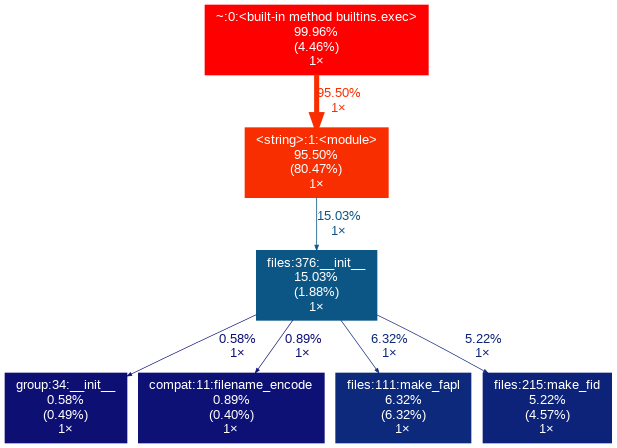

In [212]:
from IPython.display import Image

Image("output.png")

In [213]:
%%time
#Read Benchmark hdf5
import time
import numpy as np
import h5py

ds_hdf5 = h5py.File("data/test_dataset.h5", mode="r+")
    
for i in range(1_000):
    #print(f"Currently in i: {i}")
        
    val_picked = np.random.randint(low=0, high=1_000_000-1)
    tmp=0
        
    start_time = time.time()
    tmp = ds_hdf5.get("x")[val_picked]
    hdf5_read_time.append(time.time() - start_time)
        
    #print(f"Current val read at {val_picked}: {tmp}")

CPU times: user 47.3 ms, sys: 14.5 ms, total: 61.8 ms
Wall time: 55.7 ms


In [214]:
%%time
#Write Benchmark hdf5
import time
import numpy as np
import h5py

ds_hdf5 = h5py.File("data/test_dataset.h5", mode="r+")
    
for i in range(1_000):
    #print(f"Currently in i: {i}")
        
    val_picked = np.random.randint(low=0, high=1_000_000-1)
    tmp=0
    prev = ds_hdf5.get("x")[val_picked]
    curr = ds_hdf5.get("x")[val_picked]
        
    #print(f"prev item at {val_picked} is {type(prev)} and curr item at {val_picked} is {type(curr)}, both are the same : {(prev == curr).all()}")
    
    start_time = time.time()
    ds_hdf5.get("x")[val_picked] = np.random.rand(10,10,1)
    hdf5_write_time.append(time.time() - start_time)
    
    curr = ds_zarr["x"][val_picked]
    #print(f"Current val read at {val_picked}: {(prev == curr).all()}")

CPU times: user 4.17 s, sys: 13.5 s, total: 17.6 s
Wall time: 19.4 s


In [215]:
import pandas as pd

df_op = pd.DataFrame()
df_op.insert(0,"zarr_op_time", zarr_op_time)
df_op.insert(1,"netcdf4_op_time", netcdf4_op_time)
df_op.insert(2,"hdf5_op_time", hdf5_op_time)

df_read = pd.DataFrame()
df_read.insert(0,"zarr_read_time", zarr_read_time)
df_read.insert(1,"netcdf4_read_time", netcdf4_read_time)
df_read.insert(2,"hdf5_read_time", hdf5_read_time)

df_write = pd.DataFrame()
df_write.insert(0,"zarr_write_time", zarr_write_time)
df_write.insert(1,"netcdf4_write_time", netcdf4_write_time)
df_write.insert(2,"hdf5_write_time", hdf5_write_time)


In [216]:
#%%script false --no-raise-error
df_op.to_pickle("data/s_plotting_df_op.pk1")
df_read.to_pickle("data/s_plotting_df_read.pk1")
df_write.to_pickle("data/s_plotting_df_write.pk1")

In [217]:
import pandas as pd

df_op = pd.read_pickle("data/s_plotting_df_op.pk1")
df_read = pd.read_pickle("data/s_plotting_df_read.pk1")
df_write = pd.read_pickle("data/s_plotting_df_write.pk1")


In [218]:
import plotly.express as px

fig = px.box(data_frame=df_op, log_y=True)
fig.show()

fig = px.histogram(data_frame=df_op, log_y=True, marginal="violin", barmode="group")
fig.show()

fig = px.box(data_frame=df_read, log_y=True)
fig.show()

fig = px.histogram(data_frame=df_read, log_y=True, marginal="violin", barmode="group")
fig.show()

fig = px.box(data_frame=df_write, log_y=True)
fig.show()

fig = px.histogram(data_frame=df_write, log_y=True, marginal="violin", barmode="group")
fig.show()
